# Learning Handwritten Digits with Neural Networks (PyTorch)

## Introduction
A famous dataset commonly used in Machine Learning applications for practicing and experimentation is the MNIST Digits Dataset. This dataset consists of numbers written from 0-9 by hand.

The goal is to train a learner to be able to later be able to automatically recognize newly written digits. 

![PIC](https://raw.githubusercontent.com/e-loughlin/e-loughlin.github.io/main//assets/images/CS7641-ML/a1/report/images/digits.png)



## Importing Libraries

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

## Load Training and Test Datasets

In [2]:
# Specify the pre-processing transformations to use
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Training Set
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Test Set
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:01<00:00, 6634348.61it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 451633.17it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 3458256.94it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 1260622.60it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### Training Set
The training set consists of 60,000 data points, whereas the test set consists of 10,000 data points.

In [5]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

### Test Set

In [6]:
testset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

## Define the Neural Network

In the following neural network, we're defining a simple Convolutional Neural Network (CNN) designed for image classification. The MNIST Dataset consists of 28x28 pixel grayscale images.

The architecture of the neural network is as follows:

### 1. Convolutional Layer 1 (`conv1`):
- **Type**: Convolutional Layer
- **Input Channels**: 1 (since MNIST images are grayscale)
- **Output Channels**: 32
- **Kernel Size**: 3x3
- **Stride**: 1
- **Activation Function**: ReLU

This layer applies 32 convolutional filters (kernels) of size 3x3 to the input image. Each filter scans the input image and produces a feature map. The ReLU activation function is applied to introduce non-linearity.

### 2. Convolutional Layer 2 (`conv2`):
- **Type**: Convolutional Layer
- **Input Channels**: 32 (output from `conv1`)
- **Output Channels**: 64
- **Kernel Size**: 3x3
- **Stride**: 1
- **Activation Function**: ReLU

This layer takes the 32 feature maps from the previous layer as input and applies 64 convolutional filters of size 3x3. The ReLU activation function is applied again.

### 3. Max Pooling Layer:
- **Type**: Max Pooling Layer
- **Kernel Size**: 2x2
- **Stride**: 2

Max pooling is used to reduce the spatial dimensions (width and height) of the feature maps, making the network more computationally efficient. This layer takes the maximum value from each 2x2 region in the feature maps, effectively downsampling the feature maps by a factor of 2.

### 4. Flattening Layer:
- **Type**: Flattening Operation

The feature maps from the convolutional layers and the max pooling layer are flattened into a single vector. This vector serves as the input to the fully connected (linear) layers.

### 5. Fully Connected Layer 1 (`fc1`):
- **Type**: Fully Connected (Linear) Layer
- **Input Features**: 9216 (calculated as 64 channels * 12 height * 12 width, considering the input image size and the effect of the convolutional and pooling layers)
- **Output Features**: 128
- **Activation Function**: ReLU

This layer takes the flattened vector from the previous step and applies a linear transformation, followed by the ReLU activation function.

### 6. Fully Connected Layer 2 (`fc2`):
- **Type**: Fully Connected (Linear) Layer
- **Input Features**: 128 (output from `fc1`)
- **Output Features**: 10

This layer takes the 128-dimensional vector from the previous layer and applies another linear transformation to produce a 10-dimensional output. Each dimension corresponds to one of the 10 classes (digits 0-9) in the MNIST dataset.

### 7. Output:
- The output of the final fully connected layer is a 10-dimensional vector. During training and testing, this vector is passed through a loss function like CrossEntropyLoss, which applies a softmax function to convert the raw scores (logits) into probabilities for each class.

### Summary of the Architecture:

- **Input**: 1x28x28 (grayscale image)
- **Layer 1**: Convolutional layer with 32 filters of size 3x3, followed by ReLU
- **Layer 2**: Convolutional layer with 64 filters of size 3x3, followed by ReLU
- **Layer 3**: Max pooling layer with 2x2 filter
- **Flatten**: Flatten the feature maps into a vector
- **Layer 4**: Fully connected layer with 9216 input features and 128 output features, followed by ReLU
- **Layer 5**: Fully connected layer with 128 input features and 10 output features
- **Output**: 10-dimensional vector representing class scores


In [21]:
# Model definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Visualization - Computational Graph of the Network

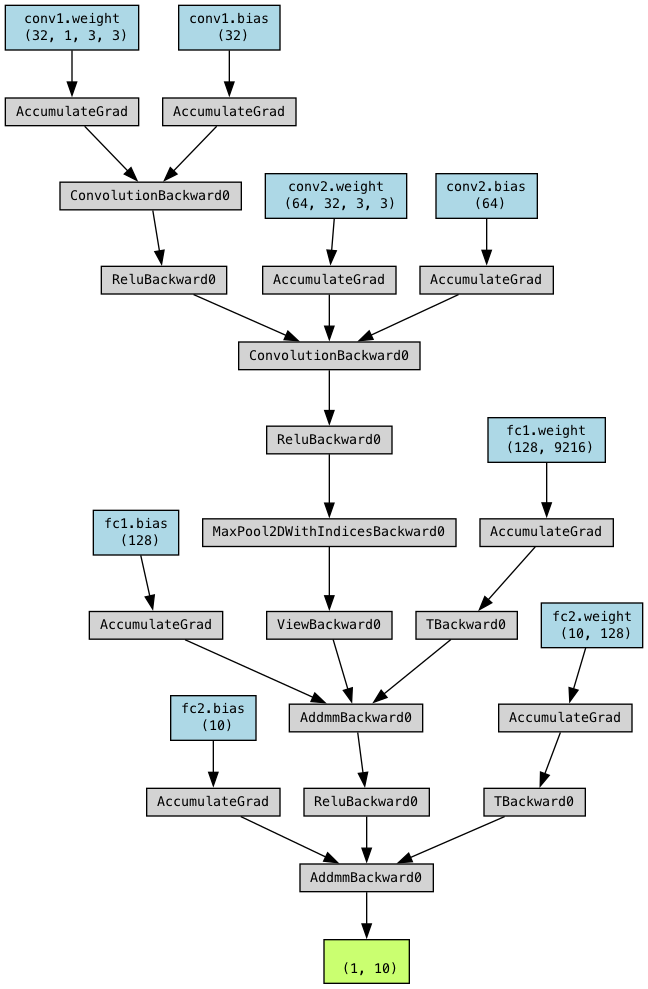

In [11]:
from torchviz import make_dot
from IPython.display import Image 

net = Net()
dummy_input = torch.randn(1,1,28,28)
output = net(dummy_input)

dot = make_dot(output, params=dict(net.named_parameters()))
dot.format = 'png'
dot.render('model_graph')
Image('model_graph.png')

## Training the Network

In [17]:

# Train the network
def train(net, train_loader, optimizer, criterion, epochs=5):
    net.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = net(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if batch_idx % 100 == 99:  # Print every 100 batches
                print(f'Epoch {epoch + 1}, Batch {batch_idx + 1}, Loss: {running_loss / 100:.4f}')
                running_loss = 0.0

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

train(net, train_loader, optimizer, criterion, epochs=5)


Epoch 1, Batch 100, Loss: 0.5708
Epoch 1, Batch 200, Loss: 0.1596
Epoch 1, Batch 300, Loss: 0.1046
Epoch 1, Batch 400, Loss: 0.0838
Epoch 1, Batch 500, Loss: 0.0691
Epoch 1, Batch 600, Loss: 0.0631
Epoch 1, Batch 700, Loss: 0.0654
Epoch 1, Batch 800, Loss: 0.0579
Epoch 1, Batch 900, Loss: 0.0676
Epoch 2, Batch 100, Loss: 0.0389
Epoch 2, Batch 200, Loss: 0.0412
Epoch 2, Batch 300, Loss: 0.0374
Epoch 2, Batch 400, Loss: 0.0444
Epoch 2, Batch 500, Loss: 0.0385
Epoch 2, Batch 600, Loss: 0.0422
Epoch 2, Batch 700, Loss: 0.0411
Epoch 2, Batch 800, Loss: 0.0363
Epoch 2, Batch 900, Loss: 0.0385
Epoch 3, Batch 100, Loss: 0.0259
Epoch 3, Batch 200, Loss: 0.0213
Epoch 3, Batch 300, Loss: 0.0218
Epoch 3, Batch 400, Loss: 0.0170
Epoch 3, Batch 500, Loss: 0.0317
Epoch 3, Batch 600, Loss: 0.0329
Epoch 3, Batch 700, Loss: 0.0237
Epoch 3, Batch 800, Loss: 0.0240
Epoch 3, Batch 900, Loss: 0.0245
Epoch 4, Batch 100, Loss: 0.0161
Epoch 4, Batch 200, Loss: 0.0099
Epoch 4, Batch 300, Loss: 0.0129
Epoch 4, B

## Testing the Trained Model

In [20]:
test_loader = DataLoader(testset, batch_size=1000, shuffle=False)

def test(net, test_loader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = net(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

test(net, test_loader)

Accuracy of the network on the 10000 test images: 99.01%


# Success! :) 